In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as st
import similaritymeasures as sm

import pdb
import sys
sys.path.append('../')
import fig_format

In [2]:
data_str = 'v2'
data_path = f'data/patterns_{data_str}.json'

with open(data_path, 'r') as f:
    data = json.load(f)

In [4]:
def to_dfs(data):
    dfs = []
    for d in data:
        dfs.append(pd.DataFrame(d['data']))
    return dfs

In [5]:
data_c1 = to_dfs(filter(lambda x: x['config']['condition'] == "1", data))
data_c2 = to_dfs(filter(lambda x: x['config']['condition'] == "2", data))
data_c3 = to_dfs(filter(lambda x: x['config']['condition'] == "3", data))

# first data_c1 is me
del data_c1[0]

In [6]:
data_c1[0]

,ix,type,phase,step,pattern,set,start_time_abs,pretrial_time,end_time,trial_time,pointer_data,error,score,move_time,shape_correct
0,0,draw,0,0,4_41,practice,69788.4,-1284.7,1208.4,70997.8,"{'time': [], 'x': [], 'y': []}",2,0.0,NaN,NaN
1,0,draw,0,0,4_41,practice,73510.7,-507.1,1208.8,74720.5,"{'time': [], 'x': [], 'y': []}",2,0.0,NaN,NaN
2,0,draw,0,0,4_41,practice,77052.4,-326.5,1916.5,874.9,"{'time': [1041.6, 1048.6, 1055.5, 1062.5, 1069...",0,14.5,1041.6,1.0
3,0,draw,0,0,4_41,practice,83698.2,-3222.3,1451.3,1437.6,"{'time': [13.7, 20.8, 28, 34.6, 41.6, 48.5, 55...",0,23.1,13.7,1.0
4,0,single,0,0,4_41,practice,88323.1,-1666.6,1604.4,965.3,"{'time': [639.1, 646.1, 653, 659.9, 666.9, 673...",0,13.7,639.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,27,draw_nofb,3,5,7_65,main,1317250.8,-1159.8,1333.4,888.6,"{'time': [444.8, 451.7, 458.8, 465.6, 472.7, 4...",0,63.9,444.8,1.0
234,28,draw_nofb,3,5,6_72,main,1321063.4,-979.1,1117.8,715.1,"{'time': [402.7, 409.9, 416.5, 423.7, 430.7, 4...",0,49.6,402.7,1.0
235,29,draw_nofb,3,5,4_40,main,1324598.3,-909.8,819.2,611.1,"{'time': [208.1, 215.2, 222.2, 229, 236.1, 243...",0,79.7,208.1,1.0
236,30,draw_nofb,3,5,6_13,main,1327855.1,-937.2,1041.5,818.9,"{'time': [222.6, 229, 236, 242.9, 249.9, 256.8...",0,59.0,222.6,1.0


In [7]:
def calc_scores(data):
    scores = dict([(j, dict([(i, []) for i in range(1, 5)])) for j in range(1, 5)]) # outside is phase #, inside is pattern #
    for ix, participant in enumerate(data):
        td = participant.query('set == "main" & score > 0')
        
        for i in range(1,5): # 4 patterns
            tdi = td.query('step == @i')
            pattern = tdi.pattern.iloc[0]
            
            p1_score = tdi.query('phase == 1')['score']
            p2_score = tdi.query('phase == 2')['score']
            p3_score = tdi.query('phase == 3')['score']
            pb_score = td.query('phase == 3 & step == 5 & pattern == @pattern').score

            scores[1][i].append(np.mean(p1_score))
            scores[2][i].append(np.mean(p2_score))
            scores[3][i].append(np.mean(p3_score))
            scores[4][i].append(np.mean(pb_score))
        
    return scores

In [8]:
scores_c1 = calc_scores(data_c1)
scores_c2 = calc_scores(data_c2)
scores_c3 = calc_scores(data_c3)

In [155]:
scores_c3

{1: {1: [64.02352941176471,
   81.61111111111113,
   73.0,
   77.115,
   69.31176470588237,
   76.23157894736842,
   68.355,
   68.36500000000001,
   62.41578947368421],
  2: [76.755,
   76.01,
   77.99,
   63.821052631578944,
   72.3157894736842,
   73.535,
   77.86500000000001,
   65.02631578947368,
   63.373684210526314],
  3: [65.36999999999999,
   76.25500000000001,
   82.22,
   57.029999999999994,
   74.57368421052631,
   75.715,
   63.71500000000001,
   71.725,
   64.48947368421052],
  4: [67.64,
   66.91,
   63.135000000000005,
   65.10000000000001,
   58.385000000000005,
   74.55,
   69.04,
   58.59499999999999,
   63.06]},
 2: {1: [61.45,
   81.05,
   69.26315789473684,
   76.78,
   60.73684210526316,
   82.61052631578947,
   76.245,
   77.71000000000001,
   68.55000000000001],
  2: [79.49000000000001,
   77.71000000000001,
   83.565,
   63.179999999999986,
   73.87777777777778,
   77.455,
   76.16,
   79.04999999999998,
   63.85],
  3: [72.77000000000001,
   77.0299999999999

In [9]:
def calc_distances(data, phase=3, samples=30):
    pdists = dict([(i, []) for i in range(1, 5)])
    for ix, participant in enumerate(data):
        td = participant.query('set == "main" & score > 0')
        
        for i in range(1,5): # 4 patterns
            tdi = td.query('step == @i')
            pattern = tdi.pattern.iloc[0]
            
            if phase <= 3: # not during bonus phase
                pdata = tdi.query('phase == @phase')['pointer_data'] # during testing phase
            else:
                pdata = td.query('phase == 3 & step == 5 & pattern == @pattern')['pointer_data'] # during bonus phase
            pdata_arrs = [] # array of positions, for use in calculating distances
            for p in pdata:
                pdata_arrs.append(np.stack([p['x'], p['y']]).T)
            dists = []
            for _ in range(samples):
                xi, xj = np.random.choice(len(pdata_arrs), 2, replace=False)
                dists.append(sm.frechet_dist(pdata_arrs[xi], pdata_arrs[xj]))
            pdists[i].append(np.mean(dists))
            
    return pdists
            
#         print(f'finished {ix+1}')

In [10]:
pdists_c1 = calc_distances(data_c1, phase=4)
pdists_c2 = calc_distances(data_c2, phase=4)
pdists_c3 = calc_distances(data_c3, phase=4)

In [11]:
pdists_c1_p3 = calc_distances(data_c1, phase=3)
pdists_c2_p3 = calc_distances(data_c2, phase=3)
pdists_c3_p3 = calc_distances(data_c3, phase=3)

In [82]:
print(pdists_c1)

{1: [188.62685355208268, 86.31933049560007, 140.06476466825558, 141.28015646547323, 124.11676671669365, 71.98059813965124, 149.09883218787022, 189.57277049051885, 409.2910559070805, 218.80485344267225], 2: [134.2565508342897, 101.84217997229088, 314.53130070652617, 201.2126070779796, 156.73875320170157, 292.9325723137707, 185.6239501494613, 157.8654250110774, 305.25617071760945, 317.72694109751285], 3: [185.13463903764577, 99.38203279059171, 229.26221838278187, 242.53643527460133, 176.22875058788043, 123.33889503383845, 129.06780661086552, 204.4016658057182, 422.8794510906549, 371.472669723821], 4: [274.7774744991287, 108.93211171336449, 226.7518790784888, 256.923951572457, 195.37605737682497, 251.02926889055348, 249.15105283701183, 609.8143963439005, 373.2548348434681, 234.09891950188205]}


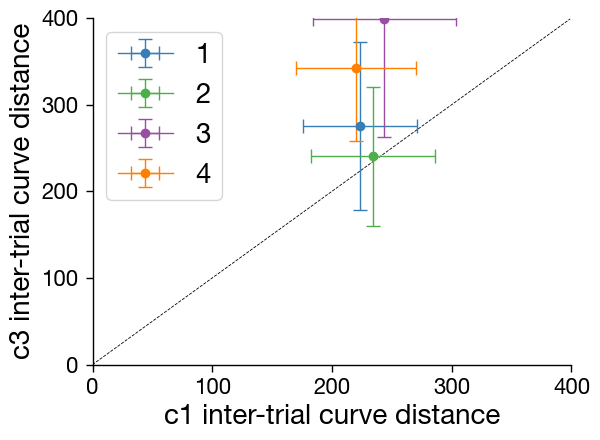

In [13]:
colors = cm.Set1
plt.plot(range(400), range(400), ls='--', c='black', lw=.6)

dx = pdists_c1_p3
dy = pdists_c3_p3
for i in range(1,5):
    i_mean_x = np.mean(dx[i])
    i_ints_x = st.norm.interval(0.9, loc=i_mean_x, scale=st.sem(dx[i]))
    i_mean_y = np.mean(dy[i])
    i_ints_y = st.norm.interval(0.9, loc=i_mean_y, scale=st.sem(dy[i]))
    plt.errorbar(i_mean_x, i_mean_y,
                 xerr=np.asarray([i_mean_x - i_ints_x[0], i_ints_x[1] - i_mean_x]).reshape(2,1),
                 yerr=np.asarray([i_mean_y - i_ints_y[0], i_ints_y[1] - i_mean_y]).reshape(2,1),
                 color=colors(i),
                 lw=1,
                 capsize=5,
                 marker='o',
                 label=i
                )

plt.xlim([0,400])
plt.ylim([0,400])
plt.xlabel('c1 inter-trial curve distance')
plt.ylabel('c3 inter-trial curve distance')
plt.legend()
fig_format.hide_frame(plt.gca())
plt.show()

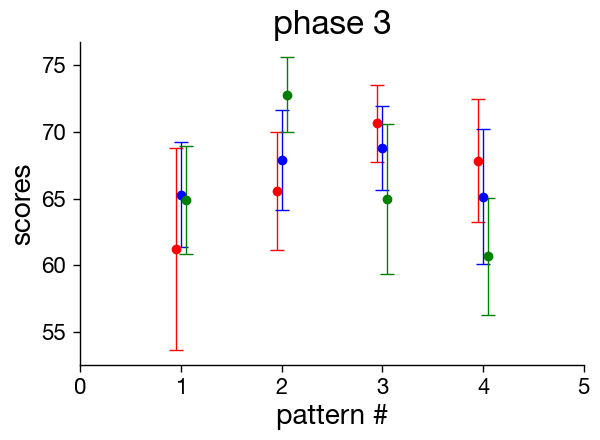

In [169]:
colors = cm.Set1
phase = 3
dx = scores_c1[phase]
dy = scores_c2[phase]
dz = scores_c3[phase]
for i in range(1,5):
    i_mean_x = np.mean(dx[i])
    i_ints_x = st.norm.interval(0.9, loc=i_mean_x, scale=st.sem(dx[i]))
    i_mean_y = np.mean(dy[i])
    i_ints_y = st.norm.interval(0.9, loc=i_mean_y, scale=st.sem(dy[i]))
    i_mean_z = np.mean(dz[i])
    i_ints_z = st.norm.interval(0.9, loc=i_mean_z, scale=st.sem(dz[i]))
    plt.errorbar(i-.05, i_mean_x,
                 yerr=np.asarray([i_mean_x - i_ints_x[0], i_ints_x[1] - i_mean_x]).reshape(2,1),
                 color='red',
                 lw=1,
                 capsize=5,
                 marker='o',
                 label=1
                )
    plt.errorbar(i, i_mean_y,
                 yerr=np.asarray([i_mean_y - i_ints_y[0], i_ints_y[1] - i_mean_y]).reshape(2,1),
                 color='blue',
                 lw=1,
                 capsize=5,
                 marker='o',
                 label=2
                )
    plt.errorbar(i+.05, i_mean_z,
                 yerr=np.asarray([i_mean_z - i_ints_z[0], i_ints_z[1] - i_mean_z]).reshape(2,1),
                 color='green',
                 lw=1,
                 capsize=5,
                 marker='o',
                 label=3
                )

plt.xlim([0, 5])
plt.title(f'phase {phase}')
plt.xlabel('pattern #')
plt.ylabel('scores')
fig_format.hide_frame(plt.gca())
plt.show()

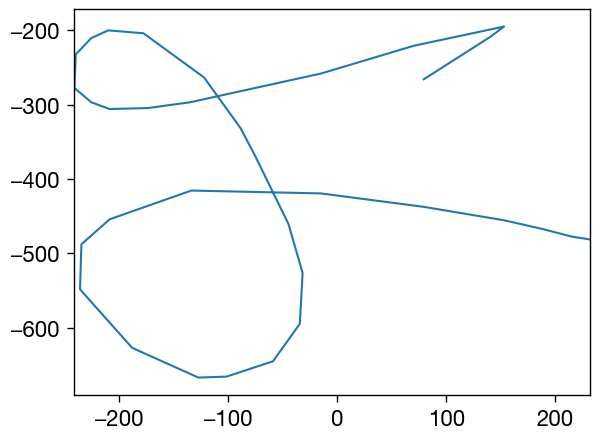

In [63]:
participant = data[2]
td = pd.DataFrame(participant['data'])
td = td[td['set'] == 'main']

tdi = td[td['step'] == 4]
pointer_data = tdi.iloc[11].pointer_data
x, y = pointer_data['x'], pointer_data['y']
plt.plot(x, y)
plt.show()

In [132]:
pd.set_option('display.max_rows', None)  # or 1000

In [40]:
pd.DataFrame(data_c1[5]['data']).query('phase == 2').shape_correct.sum()

80.0

In [48]:
data_c1[3]['config']

{'id': '5f512f61',
 'is_prolific': True,
 'is_sona': False,
 'institution': 'yale',
 'description': 'intentional-patterns v2_bonus',
 'datetime': '2022-10-19T18:29:04.503Z',
 'already_visited': False,
 'width': 1800,
 'height': 1200,
 'renderer': 'webgl',
 'user_agent': {'browser': {'name': 'Chrome',
   'version': '106.0.0.0',
   'major': '106'},
  'os': {'name': 'Mac OS', 'version': '10.15.7'}},
 'fullscreen_supported': True,
 'is_debug': False,
 'version': 1,
 'condition': '2'}